## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import copy
import pprint
pp = pprint.PrettyPrinter(indent=4)

import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [2]:
path = r'..' #provide the path of the orders.csv file
df = pd.read_csv(path + '\orders.csv')
df.shape

(534270, 7)

### Get some insights of the provided data

In [3]:
df.head()

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0


In [4]:
for i in df.columns:
    print('column %20s  has %10d unique values' %(i, df[i].unique().shape[0]))

column             order_id  has     534270 unique values
column              user_id  has     121943 unique values
column      order_timestamp  has     457853 unique values
column                 city  has         46 unique values
column              cuisine  has          4 unique values
column            paid_cash  has          2 unique values
column               amount  has       2061 unique values


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534270 entries, 0 to 534269
Data columns (total 7 columns):
order_id           534270 non-null int64
user_id            534270 non-null int64
order_timestamp    534270 non-null object
city               534270 non-null object
cuisine            534270 non-null object
paid_cash          534270 non-null bool
amount             534270 non-null float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 25.0+ MB


In [6]:
df.amount.describe()

count    534270.000000
mean          8.522366
std           6.095029
min           0.400000
25%           4.600000
50%           6.700000
75%          10.800000
max         204.800000
Name: amount, dtype: float64

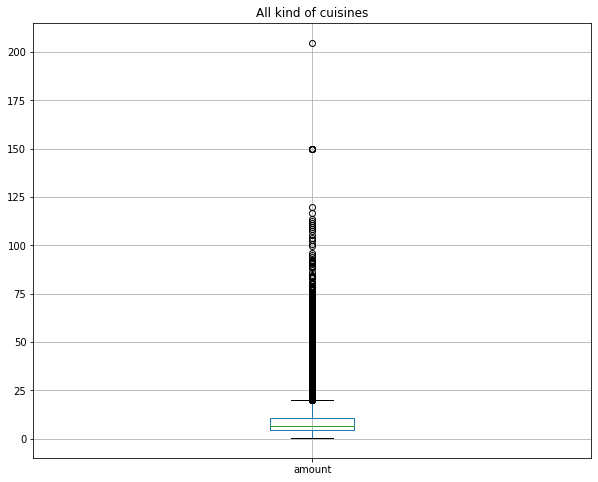

In [7]:
df.amount.plot(kind='box', figsize=(10, 8), grid=True, title='All kind of cuisines')

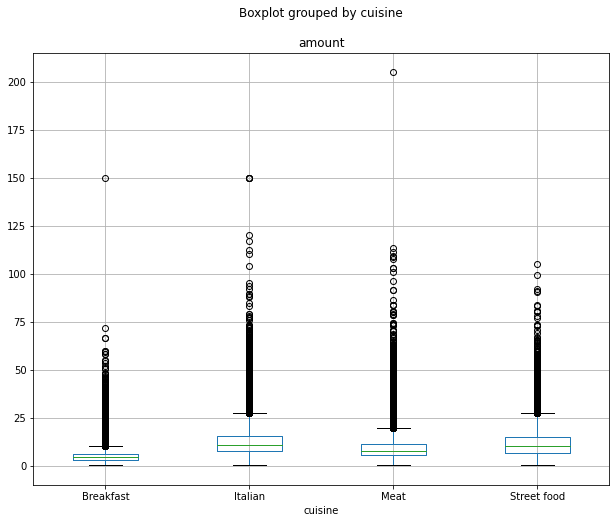

In [8]:
df.boxplot(column=["amount"], by="cuisine", figsize=(10, 8), grid = True)

## Create a safe copy of our data for the first query

In [9]:
df_q1 = df.copy()

In [10]:
# drop redundant columns for the current analysis
df_q1.drop(["paid_cash", "order_timestamp"], axis=1, inplace=True)
df_q1.shape

(534270, 5)

In [11]:
# get the amount of recordings per city
df_q1.city.value_counts()

Λάρισα            84943
Βόλος             77529
Ιωάννινα          67972
Ρόδος             50730
Ξάνθη             49401
Λαμία             36008
Αγρίνιο           33332
Αλεξανδρούπολη    24933
Δράμα             19173
Βέροια            15237
Ορεστιάδα         14822
Αίγιο              7369
Άρτα               6985
Ναύπλιο            6895
Θήβα               5546
Γρεβενά            4630
Γιαννιτσά          3578
Διδυμότειχο        3552
Μεσολόγγι          3272
Ζάκυνθος           3018
Άργος              2595
Λιβαδειά           2358
Φλώρινα            2157
Νάουσα             1766
Έδεσσα             1659
Λευκάδα            1386
Ναύπακτος          1204
Λέρος               551
Αριδαία             364
Αλεξάνδρεια         305
Μύκονος             229
Γύθειο              183
Αμαλιάδα            164
Ηγουμενίτσα          70
Αίγινα               66
Οινόφυτα             66
Νάξος                47
Αράχωβα              44
Μεγαλόπολη           40
Ιστιαία              26
Αλίαρτος             23
Γαργαλιάνοι     

In [12]:
#df_q1['freq_order'] = df_q1.groupby('city')['city'].transform('count')

In [13]:
# find the total spent amount per city
x = df_q1.loc[:,["city", "amount"]].groupby(by=["city"]).sum()
print('Shape of our data: ', x.shape)
x

Shape of our data:  (46, 1)


,amount
city,
Άνδρος,79.30
Άργος,24165.00
Άρτα,52588.77
Έδεσσα,13952.08
Αίγινα,699.70
Αίγιο,58565.13
Αγρίνιο,234225.96
Αλίαρτος,101.50
Αλεξάνδρεια,2802.60


In [14]:
# search any specific city
x.iloc[x.index == 'Ξάνθη']

,amount
city,
Ξάνθη,357272.11


In [15]:
# find the total spent amount per city
df_q1.loc[:,["city", "amount", "cuisine"]].groupby(['city', 'cuisine']).sum()

amount
city     cuisine               
Άνδρος   Meat             79.30
Άργος    Breakfast      4530.30
         Italian        2959.80
         Meat          10416.80
         Street food    6258.10
...                         ...
Ρόδος    Street food  144569.28
Φιλιατρά Italian         176.50
Φλώρινα  Breakfast      3301.80
         Meat           5100.70
         Street food    5307.00

[144 rows x 1 columns]

In [16]:
# obtain statistical indications from the total spent amount per city and per cuisine
df_q1.loc[:,["city", "amount", "cuisine"]].groupby(['city', 'cuisine']).agg(
             amount_sum=('amount', 'sum'),
             amount_count=('amount', 'count'),
             amount_mean=('amount', 'mean'),
             amount_std=('amount', 'std')
                                )

amount_sum  amount_count  amount_mean  amount_std
city     cuisine                                                       
Άνδρος   Meat              79.30             8     9.912500    5.742930
Άργος    Breakfast       4530.30           878     5.159795    3.480711
         Italian         2959.80           284    10.421831    6.294095
         Meat           10416.80           960    10.850833    6.333455
         Street food     6258.10           473    13.230655    7.437569
...                          ...           ...          ...         ...
Ρόδος    Street food   144569.28         11299    12.794874    8.350872
Φιλιατρά Italian          176.50            10    17.650000    9.324549
Φλώρινα  Breakfast       3301.80           828     3.987681    2.140199
         Meat            5100.70           735     6.939728    4.391309
         Street food     5307.00           594     8.934343    4.759579

[144 rows x 4 columns]

## Apply the condition for the cities with over 1000 orders

In [17]:
map_over1000 = df_q1.city.value_counts()

cities1000 = list(map_over1000[map_over1000 > 1000].index)

pp.pprint([ str(len(cities1000)) + ' cities that verify our condition: ' , cities1000])

[   '27 cities that verify our condition: ',
    [   'Λάρισα',
        'Βόλος',
        'Ιωάννινα',
        'Ρόδος',
        'Ξάνθη',
        'Λαμία',
        'Αγρίνιο',
        'Αλεξανδρούπολη',
        'Δράμα',
        'Βέροια',
        'Ορεστιάδα',
        'Αίγιο',
        'Άρτα',
        'Ναύπλιο',
        'Θήβα',
        'Γρεβενά',
        'Γιαννιτσά',
        'Διδυμότειχο',
        'Μεσολόγγι',
        'Ζάκυνθος',
        'Άργος',
        'Λιβαδειά',
        'Φλώρινα',
        'Νάουσα',
        'Έδεσσα',
        'Λευκάδα',
        'Ναύπακτος']]


In [18]:
# keep only the requested cities
df_q1_mapped = x.loc[x.index.isin(cities1000)]
print(' Shape of our data: ', df_q1_mapped.shape)
df_q1_mapped.head()

 Shape of our data:  (27, 1)


,amount
city,
Άργος,24165.00
Άρτα,52588.77
Έδεσσα,13952.08
Αίγιο,58565.13
Αγρίνιο,234225.96


## Create some functions for modifying our data

In [19]:
def create_basket_variable(df, df_q1, cuisine=''):
    """
    Input: 
        df: the filtered dataset (pandas.DataFrame)
        df_q1: the initial dataset created for that question (pandas.DataFrame)
    Output:
        df*: the df augmented with the basket variable (pandas.DataFrame)
    """
    
    basket_values = []
    for i in df.index : #df_q1_mapped.index:
         basket_values.append( df.loc[i,"amount"] / df_q1.city.value_counts().loc[i] ) 

    df['Basket' + cuisine] = basket_values
    
    return df
    
    
    
def create_user_per_city(df, df_q1):
    """
    Input: 
        df: the filtered dataset (pandas.DataFrame)
        df_q1: the initial dataset created for that question (pandas.DataFrame)
    Output:
        user_per_city: the amount of users per city into the df index (dictionary)
    """
    
    user_per_city = {}
    for i in df.index:
        user_per_city[i] = len(df_q1[df_q1.city == i].user_id.unique())
        
    return user_per_city




def create_freq_per_city(df, df_q1, user_per_city, cuisine=''):
    """
    Input: 
        df: the filtered dataset (pandas.DataFrame)
        df_q1: the initial dataset created for that question (pandas.DataFrame)
        user_per_city: the amount of users per city into the df index (dictionary)
    Output:
        df*: the df augmented with the frequency variable (pandas.DataFrame)
    """
    
    frequency_list = []
    for i in df.index:
         frequency_list.append( df_q1.city.value_counts().loc[i] / user_per_city[i] ) 

    df['Frequency' + cuisine] = frequency_list

    return df


def create_user3_per_city(df, df_q1, user_per_city, cuisine=''):
    """
    Input: 
        df: the filtered dataset (pandas.DataFrame)
        df_q1: the initial dataset created for that question (pandas.DataFrame)
        user_per_city: the amount of users per city into the df index (dictionary)

    Output:
        df*: the df augmented with the variable tbat denotes the proportion of users who made over 3 orders (pandas.DataFrame)
    """
    
    user3_per_city = []
    for i in df.index:
        
        y = df_q1[df_q1.city == i].user_id
        user3_per_city.append( np.count_nonzero(y.value_counts() > 3) / user_per_city[i] )
        
    df['3usersFreq' + cuisine] = user3_per_city
        
    return df



In [20]:
df_q1_mapped = create_basket_variable(df_q1_mapped, df_q1)
df_q1_mapped.head()

C:\Users\stama\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,amount,Basket
city,,
Άργος,24165.00,9.312139
Άρτα,52588.77,7.528815
Έδεσσα,13952.08,8.409934
Αίγιο,58565.13,7.947500
Αγρίνιο,234225.96,7.027060


In [21]:
user_per_city = create_user_per_city(df_q1_mapped, df_q1)
pp.pprint(user_per_city)

assert len(df_q1[df_q1.city == 'Φλώρινα'].user_id.unique()) == user_per_city["Φλώρινα"]  #669 - just a typical check

{   'Άργος': 733,
    'Άρτα': 1795,
    'Έδεσσα': 583,
    'Αίγιο': 1640,
    'Αγρίνιο': 6547,
    'Αλεξανδρούπολη': 6642,
    'Βέροια': 3955,
    'Βόλος': 17499,
    'Γιαννιτσά': 1231,
    'Γρεβενά': 1160,
    'Διδυμότειχο': 792,
    'Δράμα': 4232,
    'Ζάκυνθος': 820,
    'Θήβα': 1359,
    'Ιωάννινα': 16861,
    'Λάρισα': 22088,
    'Λαμία': 7389,
    'Λευκάδα': 273,
    'Λιβαδειά': 663,
    'Μεσολόγγι': 657,
    'Νάουσα': 528,
    'Ναύπακτος': 250,
    'Ναύπλιο': 1632,
    'Ξάνθη': 9227,
    'Ορεστιάδα': 2925,
    'Ρόδος': 11155,
    'Φλώρινα': 669}


In [22]:
df_q1_mapped = create_freq_per_city(df_q1_mapped, df_q1, user_per_city)
df_q1_mapped

C:\Users\stama\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,amount,Basket,Frequency
city,,,
Άργος,24165.00,9.312139,3.540246
Άρτα,52588.77,7.528815,3.891365
Έδεσσα,13952.08,8.409934,2.845626
Αίγιο,58565.13,7.947500,4.493293
Αγρίνιο,234225.96,7.027060,5.091187
Αλεξανδρούπολη,211504.86,8.482929,3.753839
Βέροια,138715.88,9.103884,3.852592
Βόλος,626757.01,8.084162,4.430482
Γιαννιτσά,34840.25,9.737353,2.906580


In [23]:
df_q1_mapped = create_user3_per_city(df_q1_mapped, df_q1, user_per_city)
df_q1_mapped.head()

C:\Users\stama\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,amount,Basket,Frequency,3usersFreq
city,,,,
Άργος,24165.00,9.312139,3.540246,0.300136
Άρτα,52588.77,7.528815,3.891365,0.325348
Έδεσσα,13952.08,8.409934,2.845626,0.240137
Αίγιο,58565.13,7.947500,4.493293,0.368293
Αγρίνιο,234225.96,7.027060,5.091187,0.409806


### Compute the same variables as it regards only the data that concern the <mark>Breakfast</mark> cuisine

In [24]:
df_q1_breakfast = df_q1[df_q1.cuisine == "Breakfast"]
df_q1_breakfast

,order_id,user_id,city,cuisine,amount
0,7322173742136,94223136441,Αίγιο,Breakfast,3.60
1,7210978616924,204794985423,Αγρίνιο,Breakfast,1.90
2,7221232906132,12703920390,Αγρίνιο,Breakfast,1.70
3,7399605199800,673310109528,Λιβαδειά,Breakfast,3.00
4,7264221279744,673310109528,Λιβαδειά,Breakfast,3.00
...,...,...,...,...,...
207958,7263840786692,169008847728,Ρόδος,Breakfast,5.20
207959,7400785395384,204555630573,Ρόδος,Breakfast,6.65
207960,7375063674700,311089886688,Ρόδος,Breakfast,4.60
207961,7211036589604,210899698527,Λέρος,Breakfast,2.00


In [25]:
x_breakfast = df_q1_breakfast.loc[:,["city", "amount"]].groupby(by=["city"]).sum()
x_breakfast

,amount
city,
Άργος,4530.30
Άρτα,14921.52
Έδεσσα,1863.58
Αίγινα,59.80
Αίγιο,13401.98
Αγρίνιο,55768.37
Αλίαρτος,101.50
Αλεξάνδρεια,1022.10
Αλεξανδρούπολη,55351.48


In [26]:
df_q1_breakfast_mapped = x_breakfast.loc[x_breakfast.index.isin(cities1000)]

In [27]:
cuisine_str = '_breakfast'
df_q1_breakfast_mapped = create_basket_variable(df_q1_breakfast_mapped, df_q1_breakfast, cuisine=cuisine_str)
df_q1_breakfast_mapped.head()

user_per_city_breakfast = create_user_per_city(df_q1_breakfast_mapped, df_q1_breakfast)
pp.pprint(user_per_city_breakfast)

df_q1_breakfast_mapped = create_freq_per_city(df_q1_breakfast_mapped, df_q1_breakfast, user_per_city_breakfast, cuisine=cuisine_str)
df_q1_breakfast_mapped

df_q1_breakfast_mapped = create_user3_per_city(df_q1_breakfast_mapped, df_q1_breakfast, user_per_city_breakfast, cuisine=cuisine_str)
df_q1_breakfast_mapped.head()

C:\Users\stama\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{   'Άργος': 282,
    'Άρτα': 892,
    'Έδεσσα': 162,
    'Αίγιο': 819,
    'Αγρίνιο': 3284,
    'Αλεξανδρούπολη': 3128,
    'Βέροια': 1861,
    'Βόλος': 9766,
    'Γιαννιτσά': 562,
    'Γρεβενά': 788,
    'Διδυμότειχο': 577,
    'Δράμα': 2239,
    'Ζάκυνθος': 366,
    'Θήβα': 811,
    'Ιωάννινα': 6925,
    'Λάρισα': 7130,
    'Λαμία': 3164,
    'Λευκάδα': 136,
    'Λιβαδειά': 389,
    'Μεσολόγγι': 454,
    'Νάουσα': 220,
    'Ναύπακτος': 225,
    'Ναύπλιο': 835,
    'Ξάνθη': 5136,
    'Ορεστιάδα': 1194,
    'Ρόδος': 4666,
    'Φλώρινα': 281}


C:\Users\stama\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\stama\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,amount,Basket_breakfast,Frequency_breakfast,3usersFreq_breakfast
city,,,,
Άργος,4530.30,5.159795,3.113475,0.237589
Άρτα,14921.52,4.357921,3.838565,0.318386
Έδεσσα,1863.58,4.374601,2.629630,0.172840
Αίγιο,13401.98,3.713489,4.406593,0.323565
Αγρίνιο,55768.37,3.754687,4.522838,0.354446


In [28]:
df_q1_breakfast_mapped.index

Index(['Άργος', 'Άρτα', 'Έδεσσα', 'Αίγιο', 'Αγρίνιο', 'Αλεξανδρούπολη',
       'Βέροια', 'Βόλος', 'Γιαννιτσά', 'Γρεβενά', 'Διδυμότειχο', 'Δράμα',
       'Ζάκυνθος', 'Θήβα', 'Ιωάννινα', 'Λάρισα', 'Λαμία', 'Λευκάδα',
       'Λιβαδειά', 'Μεσολόγγι', 'Νάουσα', 'Ναύπακτος', 'Ναύπλιο', 'Ξάνθη',
       'Ορεστιάδα', 'Ρόδος', 'Φλώρινα'],
      dtype='object', name='city')

In [29]:
df_q1_mapped.index

Index(['Άργος', 'Άρτα', 'Έδεσσα', 'Αίγιο', 'Αγρίνιο', 'Αλεξανδρούπολη',
       'Βέροια', 'Βόλος', 'Γιαννιτσά', 'Γρεβενά', 'Διδυμότειχο', 'Δράμα',
       'Ζάκυνθος', 'Θήβα', 'Ιωάννινα', 'Λάρισα', 'Λαμία', 'Λευκάδα',
       'Λιβαδειά', 'Μεσολόγγι', 'Νάουσα', 'Ναύπακτος', 'Ναύπλιο', 'Ξάνθη',
       'Ορεστιάδα', 'Ρόδος', 'Φλώρινα'],
      dtype='object', name='city')

In [30]:
merged = df_q1_mapped.merge(df_q1_breakfast_mapped, left_index=True, right_index=True, how='inner')
merged = pd.merge(df_q1_mapped, df_q1_breakfast_mapped, left_index=True, right_index=True, how='inner',  suffixes=('', '_drop'))
merged.drop([col for col in merged.columns if 'drop' in col], axis=1, inplace=True)

### sorted based on 

In [31]:
merged.sort_values(by=['Basket_breakfast'], ascending=False, inplace=True)

In [32]:
merged.iloc[:5]

,amount,Basket,Frequency,3usersFreq,Basket_breakfast,Frequency_breakfast,3usersFreq_breakfast
city,,,,,,,
Γρεβενά,38340.95,8.280983,3.991379,0.348276,6.722163,3.232234,0.248731
Θήβα,56455.80,10.179553,4.080942,0.337748,6.543019,3.488286,0.257707
Ρόδος,523158.73,10.312610,4.547736,0.391304,6.248685,3.715174,0.305615
Διδυμότειχο,27696.20,7.797354,4.484848,0.371212,6.178495,3.731369,0.324090
Γιαννιτσά,34840.25,9.737353,2.906580,0.239643,5.821562,2.562278,0.195730


In [33]:
merged.to_csv('query1_final.csv', encoding = 'utf-8')

## Find the top10 users per city 

In [34]:
top10users_orders = {}

for i in df_q1_mapped.index:
    
    # hold the dataset for each city
    _ = df_q1[df_q1.city == i]
    
    # find the top10 users with the more orders
    top10users = _.user_id.value_counts().nlargest(n=10)
    
    # compute the necessary proportion and round it at the 3rd decimal point
    top10users_orders[i] = np.round( _.loc[_.user_id.isin(top10users.index)].shape[0] / _.shape[0] * 100 , 3)

In [35]:
# compute the percentage of orders made by the top-10 users
for key, value in top10users_orders.items():
    print('city: %20s percentage of orders made by the corresponding top10-users: %6.3f %%' %(key, value))

city:                Άργος percentage of orders made by the corresponding top10-users: 10.250 %
city:                 Άρτα percentage of orders made by the corresponding top10-users:  5.311 %
city:               Έδεσσα percentage of orders made by the corresponding top10-users: 12.538 %
city:                Αίγιο percentage of orders made by the corresponding top10-users:  5.876 %
city:              Αγρίνιο percentage of orders made by the corresponding top10-users:  1.836 %
city:       Αλεξανδρούπολη percentage of orders made by the corresponding top10-users:  1.937 %
city:               Βέροια percentage of orders made by the corresponding top10-users:  3.465 %
city:                Βόλος percentage of orders made by the corresponding top10-users:  0.893 %
city:            Γιαννιτσά percentage of orders made by the corresponding top10-users:  6.847 %
city:              Γρεβενά percentage of orders made by the corresponding top10-users:  7.171 %
city:          Διδυμότειχο percentage of

In [36]:
top10users_orders

{'Άργος': 10.25,
 'Άρτα': 5.311,
 'Έδεσσα': 12.538,
 'Αίγιο': 5.876,
 'Αγρίνιο': 1.836,
 'Αλεξανδρούπολη': 1.937,
 'Βέροια': 3.465,
 'Βόλος': 0.893,
 'Γιαννιτσά': 6.847,
 'Γρεβενά': 7.171,
 'Διδυμότειχο': 9.685,
 'Δράμα': 2.519,
 'Ζάκυνθος': 8.35,
 'Θήβα': 7.05,
 'Ιωάννινα': 0.702,
 'Λάρισα': 0.632,
 'Λαμία': 1.727,
 'Λευκάδα': 26.623,
 'Λιβαδειά': 11.45,
 'Μεσολόγγι': 12.133,
 'Νάουσα': 15.572,
 'Ναύπακτος': 28.405,
 'Ναύπλιο': 5.787,
 'Ξάνθη': 1.277,
 'Ορεστιάδα': 3.083,
 'Ρόδος': 1.234,
 'Φλώρινα': 10.663}